In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

Start by generating a random data set and convert to pandas data frame

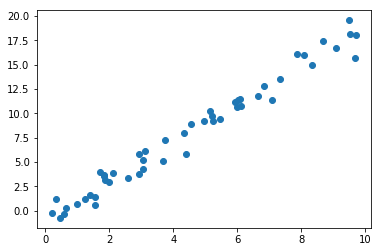

In [2]:
rng = np.random.RandomState(42)
x_df = pd.DataFrame(10 * rng.rand(50))
y_df = pd.DataFrame(2 * x_df[0] - 1 + rng.randn(50))
plt.scatter(x_df, y_df);

In [3]:
x_df.head()

,0
0,3.745401
1,9.507143
2,7.319939
3,5.986585
4,1.560186


In [4]:
y_df.head()

,0
0,7.229269
1,18.185654
2,13.524231
3,10.672066
4,0.641851


Initialize a LinearRegression model (empty to begin with)

In [5]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Similar to the caret ML package in R, the model object has a "fit()" function to fit the parameters

In [6]:
model.fit(x_df, y_df)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
model.coef_

array([[1.9776566]])

In [8]:
model.intercept_

array([-0.90331073])

Visualize the fit line (which is also the prediction for any new points)

In [9]:
xfit = np.linspace(-1, 11)

In [10]:
xfit_df = pd.DataFrame(xfit)
yfit_df = pd.DataFrame(model.predict(xfit_df))

In [11]:
yfit_df.head()

,0
0,-2.880967
1,-2.396643
2,-1.912319
3,-1.427995
4,-0.943671


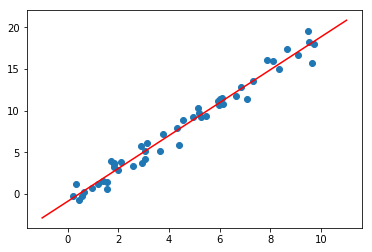

In [12]:
plt.scatter(x_df, y_df)
plt.plot(xfit_df, yfit_df, color='red');

## Clustering

In [13]:
from numpy.random import normal
np.random.seed(2019)
N = 30
U1 = 5
U2 = 20
gene_df = pd.DataFrame({'gene_a':np.concatenate((normal(loc=U2, size=N), normal(loc=U1, size=N), normal(loc=U1, size=N))),
                        'gene_b':np.concatenate((normal(loc=U1, size=N), normal(loc=U1, size=N), normal(loc=U2, size=N))),
                        'explant_id':[0]*N + [1]*N + [2]*N
                        })

In [14]:
gene_df.head()

,gene_a,gene_b,explant_id
0,19.782321,4.307624,0
1,20.821455,4.222426,0
2,21.481278,5.211549,0
3,21.331864,4.724073,0
4,19.638135,4.793755,0


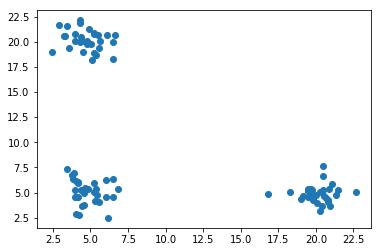

In [15]:
plt.scatter(gene_df.gene_a, gene_df.gene_b)

#### K-Means

In [16]:
from sklearn.cluster import KMeans

In [17]:
gene_kmeans_fit = KMeans(init='k-means++', n_clusters=3, n_init=10).fit(gene_df[['gene_a', 'gene_b']])
gene_kmeans_fit.cluster_centers_
gene_kmeans_fit.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

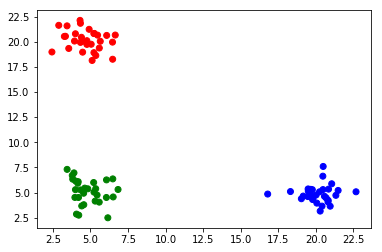

In [18]:
color_dict = {0:'green', 1:'red', 2:'blue'}
colors = [color_dict[x] for x in gene_kmeans_fit.labels_]
plt.scatter(gene_df.gene_a, gene_df.gene_b, color=colors);

#### Agglomerative clustering

In [19]:
from sklearn.cluster import AgglomerativeClustering

In [20]:
ac_fit = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average').fit(gene_df[['gene_a', 'gene_b']])
ac_fit.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

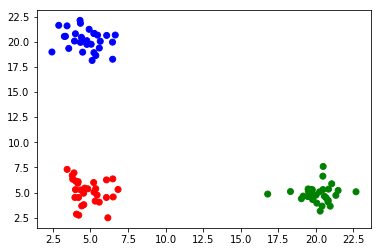

In [21]:
color_dict = {0:'green', 1:'red', 2:'blue'}
colors = [color_dict[x] for x in ac_fit.labels_]
plt.scatter(gene_df.gene_a, gene_df.gene_b, color=colors);

### Classification

In [22]:
new_samples_df = pd.DataFrame({'gene_a':np.concatenate((normal(loc=U2*1.3, size=10), normal(loc=U1*1.3, size=10))),
                               'gene_b':np.concatenate((normal(loc=U1*1.3, size=10), normal(loc=U1*1.3, size=10)))
                             })

#### K Nearest Neighbors

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn_fit = KNeighborsClassifier(n_neighbors=5).fit(gene_df[['gene_a', 'gene_b']], gene_df['explant_id'])
knn_labels = knn_fit.predict(new_samples_df)
knn_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

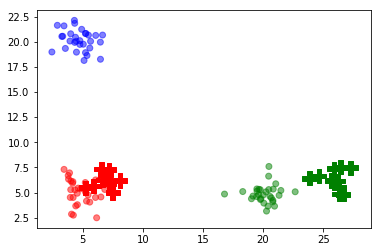

In [25]:
color_dict = {0:'green', 1:'red', 2:'blue'}
colors = [color_dict[x] for x in gene_df.explant_id]
plt.scatter(gene_df.gene_a, gene_df.gene_b, color=colors, alpha=0.5);
new_colors = [color_dict[x] for x in knn_labels]
plt.scatter(new_samples_df.gene_a, new_samples_df.gene_b, color=new_colors, marker='P', s=200);

#### Support Vector Machine

In [26]:
from sklearn.svm import SVC

In [27]:
svm_fit = SVC(gamma='scale').fit(gene_df[['gene_a', 'gene_b']], gene_df['explant_id'])
svm_labels = svm_fit.predict(new_samples_df)
svm_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

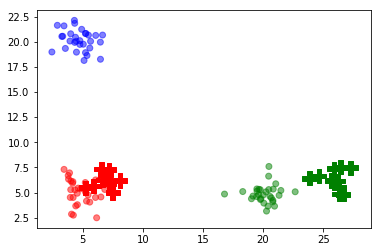

In [28]:
color_dict = {0:'green', 1:'red', 2:'blue'}
colors = [color_dict[x] for x in gene_df.explant_id]
plt.scatter(gene_df.gene_a, gene_df.gene_b, color=colors, alpha=0.5);
new_colors = [color_dict[x] for x in svm_labels]
plt.scatter(new_samples_df.gene_a, new_samples_df.gene_b, color=new_colors, marker='P', s=200);

#### Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf_fit = RandomForestClassifier(n_estimators=11, min_samples_split=3).fit(gene_df[['gene_a', 'gene_b']], gene_df['explant_id'])
rf_labels = rf_fit.predict(new_samples_df)
rf_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

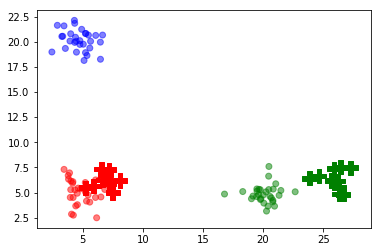

In [31]:
color_dict = {0:'green', 1:'red', 2:'blue'}
colors = [color_dict[x] for x in gene_df.explant_id]
plt.scatter(gene_df.gene_a, gene_df.gene_b, color=colors, alpha=0.5);
new_colors = [color_dict[x] for x in rf_labels]
plt.scatter(new_samples_df.gene_a, new_samples_df.gene_b, color=new_colors, marker='P', s=200);

In [32]:
rf_fit.feature_importances_

array([0.4837443, 0.5162557])

### Data Pre-processing

#### Scaling

In [33]:
from sklearn import preprocessing

In [34]:
# One-time scaling
scaled_gene_df = gene_df.copy()
print('before scaling')
print(scaled_gene_df.head(3))
scaled_gene_df[['gene_a', 'gene_b']] = preprocessing.scale(gene_df[['gene_a', 'gene_b']])
print('after scaling')
print(scaled_gene_df.head(3))

before scaling
      gene_a    gene_b  explant_id
0  19.782321  4.307624           0
1  20.821455  4.222426           0
2  21.481278  5.211549           0
after scaling
     gene_a    gene_b  explant_id
0  1.352324 -0.791744           0
1  1.494503 -0.803533           0
2  1.584784 -0.666662           0


In [35]:
# Re-apply the same scaling factors over and over
scaler_fit = preprocessing.StandardScaler().fit(gene_df[['gene_a', 'gene_b']])
scaled_gene_df[['gene_a', 'gene_b']] = scaler_fit.transform(gene_df[['gene_a', 'gene_b']])
print('after scaling')
print(scaled_gene_df.head(3))

after scaling
     gene_a    gene_b  explant_id
0  1.352324 -0.791744           0
1  1.494503 -0.803533           0
2  1.584784 -0.666662           0


#### Train/Test Split

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(gene_df[['gene_a', 'gene_b']], gene_df.explant_id, test_size=0.25)
print(X_train.shape, X_test.shape)

(67, 2) (23, 2)


### Dimensionality Reduction

In [38]:
from sklearn.decomposition import PCA

In [39]:
reduced_gene_array = PCA(n_components=2).fit_transform(gene_df)
reduced_gene_df = pd.DataFrame(reduced_gene_array)
reduced_gene_df.head()

,0,1
0,-11.111262,-2.821936
1,-11.910342,-3.487859
2,-11.691172,-4.656280
3,-11.924316,-4.203381
4,-10.670046,-3.068519
